# 1 - Importing Libraries : 

In [1]:
import numpy as np #For algebrical operations.
import pandas as pd # For EDA purposes.
import seaborn as sns # For Datavisuals
import matplotlib.pyplot as plt #For Data visuals

# 2 - Data Processing : 

In [2]:
data = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt")

# 3 - EDA (EXPLORATORY DATA ANALYSIS): 

In [3]:
data.head() #Printing the head or first few rows of our data.

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [4]:
data.shape # Shape in (ROWS*COLUMNS) format.

(1858, 7)

In [5]:
data.describe() #Statistical description of our data.

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [6]:
 data.isna().sum() #Sum of all null-values in our dataset.

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

# 4 - Splitting the data into Train-Test : 

In [7]:
# Defining training size to be 80% of the overall data.
training_size = int(len(data)*0.80)

#Defining the Length of data.
data_len = len(data)

# Defining Training and Testing Data.
train=data[0:training_size]
test=data[training_size:data_len]

In [8]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


# 5 - Scaling the data (min-max Scaler) : 

### NOTE : 
**SCALING** is to be used in cases where the shape of distribution is not at all affected , In cases of **NORMALIZING** we do change the shape of our distribution.

In [9]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

# Defining range for Scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [10]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

# Splitting the data into "X" and "Y" terms.
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
# Reshaping the data as per as our need.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (1446, 40, 1)
y_train shape -->  (1446,)


# Buliding RNN model.


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

2024-05-04 12:13:17.596294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 12:13:17.596425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 12:13:17.734388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
# Initialize a sequential model
regressor = Sequential()  

# Add the first SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  

# Add the second SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))  # Add dropout regularization

# Add the third SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2)) 

# Add the fourth SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2)) 

# Add the output layer
regressor.add(Dense(units=1))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compling the MODEL : 

Now we may define our optimizers in this case we are using **ADAM** with the loss function being "**MSE (Mean Squared Error)**":  

In [14]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

**Epochs** are the number of iterations we are gonna use to make our model read the data repeatedly and **batch size** is gonna be the size of data we are gonna be giving in our model.

In [15]:
epochs = 100 
batch_size = 20

### We are fitting the model now in to our Regressor model also known as the process of training the model. 

In [16]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3453
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1674
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0773
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0528
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0323
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0283
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0253
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0199
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156
Epoch 13/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0114
Epoch 14/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117
Epoch 15/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - lo

In [17]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


# Defining actual price of our data.

In [18]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (372, 1)


In [19]:
# Concatenate the "Open" values from data and test datasets
dataset_total = pd.concat((data["Open"], test["Open"]), axis=0)

# Extract inputs for the test dataset with consideration of timesteps
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1, 1)

# Transform inputs using the previously fitted scaler
inputs = scaler.transform(inputs)


In [20]:
# Initialize an empty list to store test input sequences
X_test = []

# Iterate over the range to create input sequences
for i in range(timesteps, 412):
    X_test.append(inputs[i - timesteps : i, 0])

# Convert the list of sequences into a numpy array
X_test = np.array(X_test)

# Print the shape of the X_test array
print("X_test shape --> ", X_test.shape)


X_test shape -->  (372, 40)


In [21]:
# Reshape X_test to match the input shape required by the model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the trained regressor model
predict = regressor.predict(X_test)

# Inverse transform the predictions to original scale
predict = scaler.inverse_transform(predict)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


# Plotting the "Results".

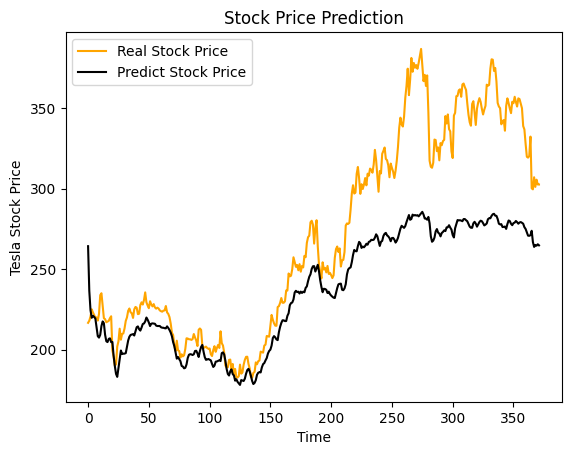

In [22]:
plt.plot(real_price, color = "orange", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()